# Support for dask arrays

It is possible to operate on dask arrays and spare the memory (or perhaps even time).

In [1]:
# Necessary imports
import dask
import physt
import numpy as np

import dask.array as da
from physt import h1, h2
%matplotlib inline

In [2]:
# Create two arrays
np.random.seed(42)

SIZE = 2000000
CHUNK = SIZE / 100

million = np.random.rand(SIZE)#.astype(int)
million2 = (3 * million + np.random.normal(0., 0.3, SIZE))#.astype(int)

# Chunk them for dask
chunked = da.from_array(million, chunks=(CHUNK))
chunked2 = da.from_array(million2, chunks=(CHUNK))

## Create histograms

`h1`, `h2`, ... have their alternatives in `physt.dask_compat`. They should work similarly. Although, they are not complete and unexpected errors may occur.

In [3]:
from physt.dask_compat import h1 as d1
from physt.dask_compat import h2 as d2

Check:  True


Histogram1D(bins=28, total=2000000.0)

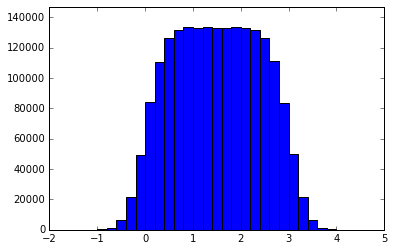

In [4]:
# Use chunks to create a 1D histogram
ha = d1(chunked2, "fixed_width", 0.2)
check_ha = h1(million2, "fixed_width", 0.2)
ok = (ha == check_ha)
print("Check: ", ok)
ha.plot()
ha

Check:  True


Histogram2D(bins=(5, 28), total=2000000.0)

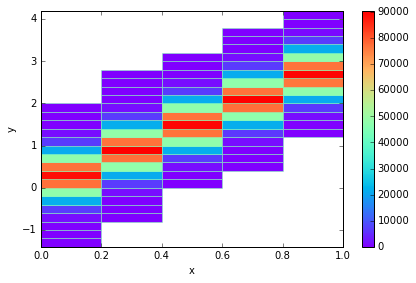

In [5]:
# Use chunks to create a 2D histogram
hb = d2(chunked, chunked2, "fixed_width", .2, axis_names=["x", "y"])
check_hb = h2(million, million2, "fixed_width", .2, axis_names=["x", "y"])
hb.plot(show_zero=False, cmap="rainbow")
ok = (hb == check_hb)
print("Check: ", ok)
hb

Check:  True


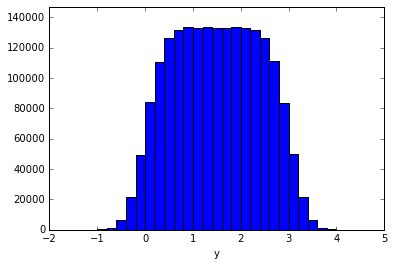

In [6]:
# And another cross-check
hh = hb.projection("y")
hh.plot()
print("Check: ", np.array_equal(hh.frequencies, ha.frequencies))   # Just frequencies

In [7]:
# Use dask for normal arrays (will automatically split)
d1(million2, "fixed_width", 0.2) == ha

True